In [13]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x), -a*np.exp(b*x)

In [92]:
def circleConstI (x):
    return math.sqrt(625-(x+26.5)**2), -math.sqrt(625-(x+26.5)**2)

In [93]:
def circleConstE (x):
    return math.sqrt(784-(x+26.5)**2), -math.sqrt(784-(x+26.5)**2)

In [104]:
def circleConstM (x):
    return math.sqrt(702.25-(x+26.5)**2), -math.sqrt(702.25-(x+26.5)**2)

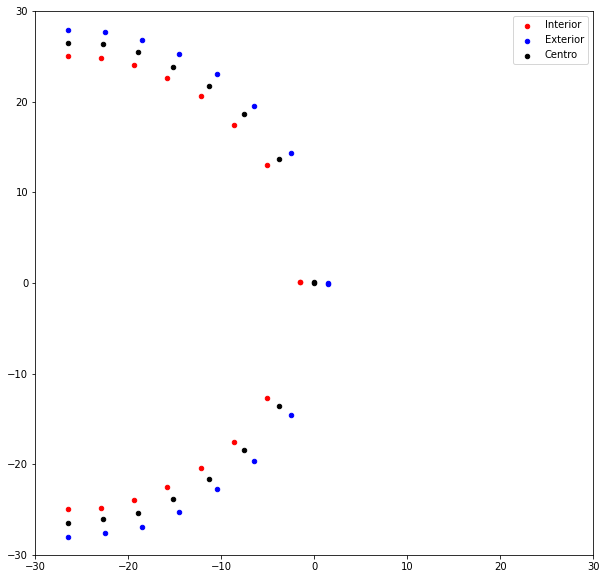

In [118]:
# Generate dummy dataset
num = 8
x_dummy_I = np.linspace(start=-26.5, stop=-1.5, num=num)
x_dummy_I = np.concatenate((x_dummy_I, x_dummy_I[::-1]))

num = 8
x_dummy_E = np.linspace(start=-26.5, stop=1.5, num=num)
x_dummy_E = np.concatenate((x_dummy_E, x_dummy_E[::-1]))

num = 8
x_dummy_M = np.linspace(start=-26.5, stop=0, num=num)
x_dummy_M = np.concatenate((x_dummy_M, x_dummy_M[::-1]))

# Calculate y-values based on dummy x-values
y_dummy_I = np.zeros([num*2])
for i in range(0,num):
    y_dummy_I[i], y_dummy_I[num*2-1-i] = circleConstI(x_dummy_I[i])
# Add noise from a Gaussian distribution
noise = 0.1*np.random.normal(size=y_dummy_I.size)
y_dummy_I = y_dummy_I + noise


# Calculate y-values based on dummy x-values
y_dummy_E= np.zeros([num*2])
for i in range(0,num):
    y_dummy_E[i], y_dummy_E[num*2-1-i] = circleConstE(x_dummy_E[i])
# Add noise from a Gaussian distribution
noise = 0.1*np.random.normal(size=y_dummy_E.size)
y_dummy_E = y_dummy_E + noise


# Calculate y-values based on dummy x-values
y_dummy_M= np.zeros([num*2])
for i in range(0,num):
    y_dummy_M[i], y_dummy_M[num*2-1-i] = circleConstM(x_dummy_M[i])
# Add noise from a Gaussian distribution
noise = 0.1*np.random.normal(size=y_dummy_M.size)
y_dummy_M = y_dummy_M + noise


# Plot the noisy exponential data
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(111)
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
plt.scatter(x_dummy_I, y_dummy_I, s=20, label='Interior', color='red')
plt.scatter(x_dummy_E, y_dummy_E, s=20, label='Exterior', color='blue')
plt.scatter(x_dummy_M, y_dummy_M, s=20, label='Centro', color='black')
plt.legend()

In [108]:
def circleHorI (x):
    return math.sqrt(20.25-(x+6)**2), -math.sqrt(20.25-(x+6)**2)

In [109]:
def circleHorE (x):
    return math.sqrt(56.25-(x+6)**2), -math.sqrt(56.25-(x+6)**2)

In [110]:
def circleHorM (x):
    return math.sqrt(36-(x+6)**2), -math.sqrt(36-(x+6)**2)

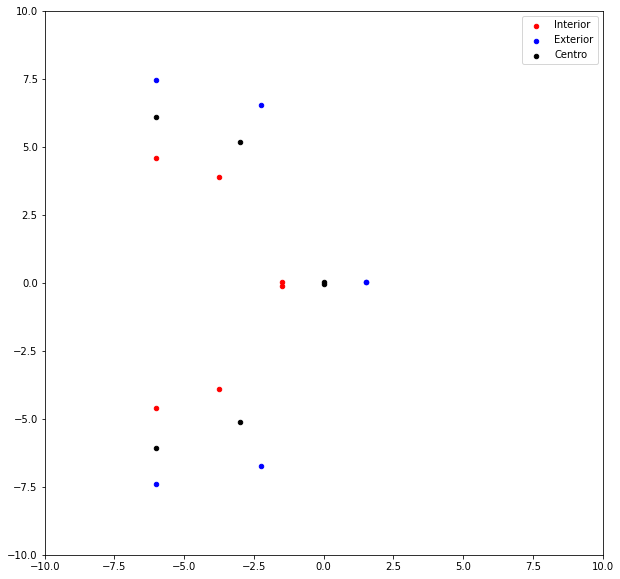

In [119]:
# Generate dummy dataset
num = 3
x_dummy_I = np.linspace(start=-6, stop=-1.5, num=num)
x_dummy_I = np.concatenate((x_dummy_I, x_dummy_I[::-1]))

num = 3
x_dummy_E = np.linspace(start=-6, stop=1.5, num=num)
x_dummy_E = np.concatenate((x_dummy_E, x_dummy_E[::-1]))

num = 3
x_dummy_M = np.linspace(start=-6, stop=0, num=num)
x_dummy_M = np.concatenate((x_dummy_M, x_dummy_M[::-1]))

# Calculate y-values based on dummy x-values
y_dummy_I = np.zeros([num*2])
for i in range(0,num):
    y_dummy_I[i], y_dummy_I[num*2-1-i] = circleHorI(x_dummy_I[i])
# Add noise from a Gaussian distribution
noise = 0.1*np.random.normal(size=y_dummy_I.size)
y_dummy_I = y_dummy_I + noise


# Calculate y-values based on dummy x-values
y_dummy_E= np.zeros([num*2])
for i in range(0,num):
    y_dummy_E[i], y_dummy_E[num*2-1-i] = circleHorE(x_dummy_E[i])
# Add noise from a Gaussian distribution
noise = 0.1*np.random.normal(size=y_dummy_E.size)
y_dummy_E = y_dummy_E + noise


# Calculate y-values based on dummy x-values
y_dummy_M= np.zeros([num*2])
for i in range(0,num):
    y_dummy_M[i], y_dummy_M[num*2-1-i] = circleHorM(x_dummy_M[i])
# Add noise from a Gaussian distribution
noise = 0.1*np.random.normal(size=y_dummy_M.size)
y_dummy_M = y_dummy_M + noise


# Plot the noisy exponential data
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(111)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.scatter(x_dummy_I, y_dummy_I, s=20, label='Interior', color='red')
plt.scatter(x_dummy_E, y_dummy_E, s=20, label='Exterior', color='blue')
plt.scatter(x_dummy_M, y_dummy_M, s=20, label='Centro', color='black')
plt.legend()

In [133]:
class Triangulacion():

    def __init__(self, conos_interiores, conos_exteriores):
        self.internalNp = None
        self.interpolacion = None
        #self.conos_interiores = np.array([[o.point.x, o.point.y] for o in conos_interiores])
        #self.conos_exteriores = np.array([[o.point.x, o.point.y] for o in conos_exteriores])

        # TODO, ESTO ES PROVISIONAL, Precondición: La lista de conos ya viene ordenada
        self.conos_exteriores = self.ordenar_respecto([0, 0], self.conos_exteriores)
        self.conos_interiores = self.ordenar_respecto([0, 0], self.conos_interiores)

    def ordenar_respecto(self, coche, lista):
        return np.array(sorted(lista, key=lambda p: (p[0] - coche[0]) ** 2 + (p[1] - coche[1]) ** 2))

    def getEdges(self, triangle, edges, isEven):
        # t0 t1
        if (isEven[0] + isEven[1] == 1):
            edges[triangle[0], triangle[1]] = 1
            edges[triangle[1], triangle[0]] = 1
        # t0 t2
        if (isEven[0] + isEven[2] == 1):
            edges[triangle[0], triangle[2]] = 1
            edges[triangle[2], triangle[0]] = 1
        # t1 t2
        if (isEven[1] + isEven[2] == 1):
            edges[triangle[1], triangle[2]] = 1
            edges[triangle[2], triangle[1]] = 1
        return edges

    def triangulacion(self):

        nci = len(self.conos_interiores)  # Numeros de conos interiores en la lista de conos
        col = 2
        nce = len(self.conos_exteriores)  # Numeros de conos exteriores en la lista de conos
        if (nci > 0 and nce > 0):

            maxConosLado = max(nci, nce)
            P = np.zeros((2 * maxConosLado, col))

            for i in range(0, maxConosLado):
                if (i >= nci):  # Solo quedan conos exteriores
                    P[i * 2] = self.conos_interiores[nci - 1]
                    P[i * 2 + 1] = self.conos_exteriores[i]
                elif (i >= nce):  # Solo quedan conos interiores
                    P[i * 2] = self.conos_interiores[i]
                    P[i * 2 + 1] = self.conos_exteriores[nce - 1]
                else:  # Quedan de los 2
                    P[i * 2] = self.conos_interiores[i]
                    P[i * 2 + 1] = self.conos_exteriores[i]

            internal = []
            # (12.939980506896973, 6.089759349822998) x
            # (3.0638973712921143, -1.9238924980163574) y
            xMaxI, yMaxI = self.conos_interiores.max(axis=0)
            xMinI, yMinI = self.conos_interiores.min(axis=0)

            xMaxE, yMaxE = self.conos_exteriores.max(axis=0)
            xMinE, yMinE = self.conos_exteriores.min(axis=0)

            xMax, yMax = max(xMaxI, xMaxE), max(yMaxI, yMaxE)
            xMin, yMin = min(xMinI, xMinE), min(yMinI, yMinE)

            # Posición del eje de dirección (No esta bien)
            dirX = 0.0
            dirY = 0.0

            internal.append(np.array([dirX, dirY]))  # Para despues hacer la trayectoria desde el morro del coche

            # edgesMatrix = np.zeros([P.shape[0], P.shape[0]])
            edgesMatrix = np.zeros([maxConosLado * 2, maxConosLado * 2])

            # Crear triangulacion con constantes
            TR = Delaunay(P)

            s = TR.simplices
            i = 0
            while (i < s.shape[0]):

                x = s[i]
                isEven = x % 2
                if ((isEven[0] == 0 and isEven[1] == 0 and isEven[2] == 0) or (
                        isEven[0] == 1 and isEven[1] == 1 and isEven[2] == 1)):
                    s = np.delete(s, i, 0)
                else:
                    edgesMatrix = self.getEdges(x, edgesMatrix, isEven)
                    i = i + 1

            for fila in range(0, P.shape[0]):
                for columna in range(0, fila):
                    if (edgesMatrix[fila][columna] == 1):  # Es uno interno
                        p1 = P[fila]
                        p2 = P[columna]

                        internal.append(np.array([(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2]))

            self.internalNp = np.array(internal)

            tck, u = splprep([self.internalNp[:, 0], self.internalNp[:, 1]], k=3, s=32)
            u = np.linspace(0, 1, num=50, endpoint=True)
            self.interpolacion = splev(u, tck)

            return self.internalNp, self.interpolacion, P, s, (xMax, xMin), (yMax, yMin)
        else:
            return None, None, None, None, None, None


In [132]:
xI = np.array(x_dummy_I)
yI = np.array(y_dummy_I)
pI = np.array([xI,yI])
pI = np.transpose(pI)

xE = np.array(x_dummy_E)
yE = np.array(y_dummy_E)
pE = np.array([xE,yE])
pE = np.transpose(pE)

triangulaciono = Triangulacion(pI, pE)


AttributeError: 'Triangulacion' object has no attribute 'conos_exteriores'